In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats.distributions import gamma
import numpy as np
import seaborn as sns
import scipy.stats
import scipy.optimize
import math
import warnings

In [2]:
warnings.filterwarnings(action='ignore')

In [3]:
sns.set_theme(palette = "bright")

# Diabetes

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Pregnancies
Number of times pregnant

Glucose
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure
Diastolic blood pressure (mm Hg)

SkinThickness
Triceps skin fold thickness (mm)

Insulin
2-Hour serum insulin (mu U/ml)

BMI
Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction
Diabetes pedigree function

Age
Age (years)

Outcome
Class variable (0 or 1) 268 of 768 are 1, the others are 0

In [4]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 2. Непараметрическая оценка плотности распределения в виде гистограммы и используя функцию плотности ядра (или закона вероятности в случае дискретной СВ

In [127]:
count_bins = round(1 + 3.32 * math.log(data.shape[0]))

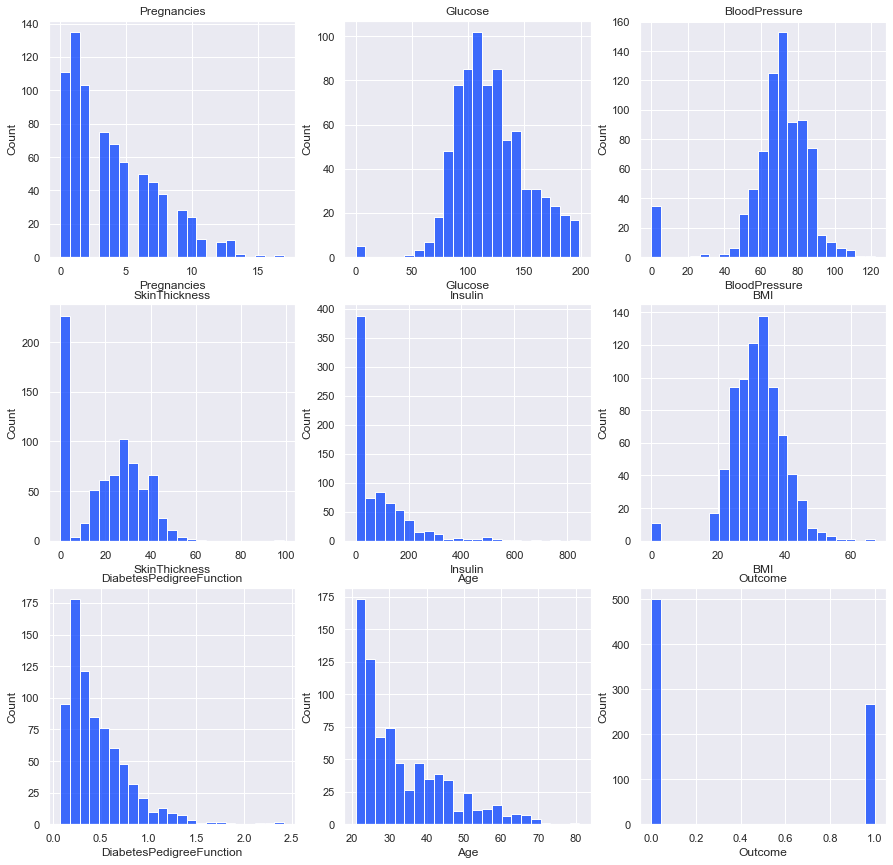

In [7]:
plt.figure(figsize=(15, 20))
plot_number = 0
for feature_name in data.columns:
    plot_number += 1
    plt.subplot(4, 3, plot_number)
    sns.histplot(data=data[feature_name], bins=count_bins)
    plt.title(feature_name)

In [8]:
piece_data = data[['DiabetesPedigreeFunction','Glucose','BloodPressure','BMI']]

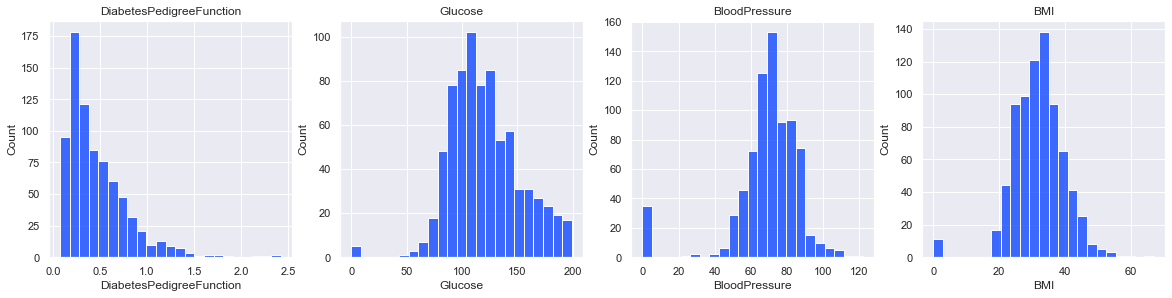

In [9]:
plt.figure(figsize=(20, 20))
plot_number = 0
for feature_name in piece_data.columns:
    plot_number += 1
    plt.subplot(4, 4, plot_number)
    sns.histplot(data=piece_data[feature_name], bins=count_bins)
    plt.title(feature_name)

Гистограмма и ядерная оценка


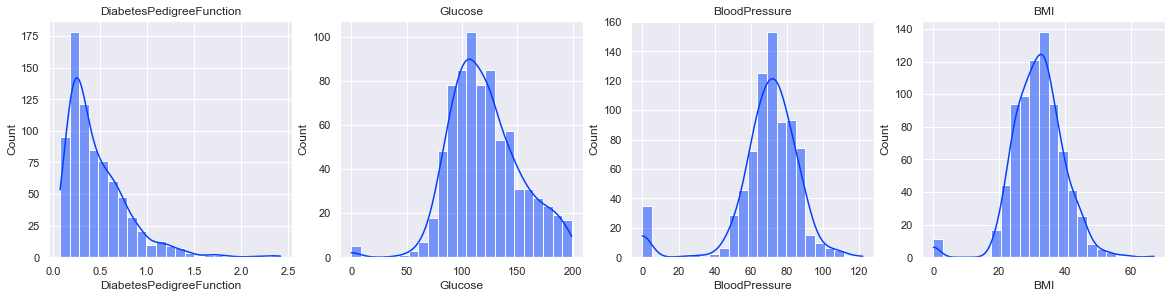

In [10]:
plt.figure(figsize=(20,20))
plot_number = 0

print("Гистограмма и ядерная оценка")
for feature_name in piece_data.columns:
    plot_number += 1
    plt.subplot(4,4, plot_number)
    sns.histplot(data=piece_data[feature_name], bins=count_bins, kde=True,palette ='bright' )
    plt.title(feature_name)

plt.show()

#### 3. Провести оценку порядковых статистик и представить их в виде “ящиков с усами”.

In [489]:
def order_statistic(column):
    q = [0.1, 0.25, 0.5, 0.75, 0.9]
    quanls = column.quantile(q=q)
    col_min = column.min()
    col_max = column.max()
    return [quanls,col_min,col_max]

def plot_box(column, quants):
    figure, ax = plt.subplots(1, 1, figsize=(10, 3))
    
    boxplot = sns.boxplot(column, ax=ax, linewidth=0.5)
    
    for quant in quants:
        ax.axvline(quant, color='black', linestyle='--', alpha=0.5)
        
    plt.title(column.name)
    plt.show()


      DiabetesPedigreeFunction
0.10                   0.16500
0.25                   0.24375
0.50                   0.37250
0.75                   0.62625
0.90                   0.87860


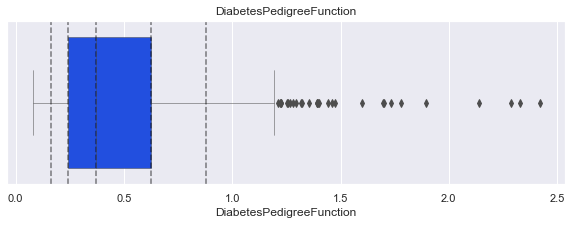

      Glucose
0.10    85.00
0.25    99.00
0.50   117.00
0.75   140.25
0.90   167.00


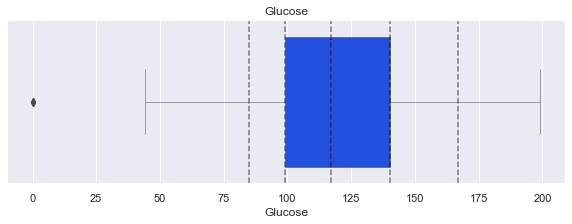

      BloodPressure
0.10           54.0
0.25           62.0
0.50           72.0
0.75           80.0
0.90           88.0


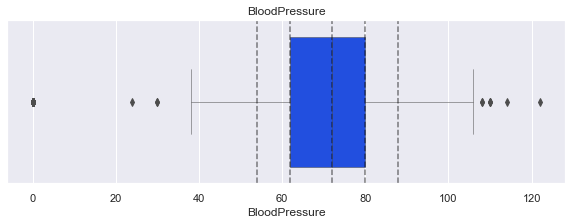

       BMI
0.10  23.6
0.25  27.3
0.50  32.0
0.75  36.6
0.90  41.5


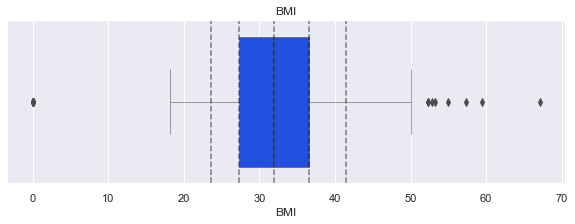

In [493]:
for col in list(piece_data.columns):
    quants, col_min,col_max = order_statistic(piece_data[col])
    print(pd.DataFrame(quants))
    plot_box(piece_data[col],quants)

#### 4. Теоретические распределения, которые описывают полученные выборки

In [441]:
def draw_dists(column,dists):
    
    figure, ax = plt.subplots(1, 1, figsize=(10, 5))
    subplot = sns.histplot(column, kde=False, stat='density',bins=25,color = 'y')
      
    x = np.linspace(np.min(column), np.max(column), 100)
    
    for dist in dists:
        name = type(dist).__name__
        res = dist.fit(column)
        print("Dist: ",name, "val:", res)
        y = dist.pdf(x, *res)
        sns.lineplot(x, y, label=name)
        
    plt.legend()


Dist:  norm_gen val: (31.992578124999998, 7.87902573154013)
Dist:  beta_gen val: (1624.0342725773457, 173.01352532589289, -988.5221422548877, 1129.2331323470826)
Dist:  logistic_gen val: (32.00100187512694, 4.18772728702919)


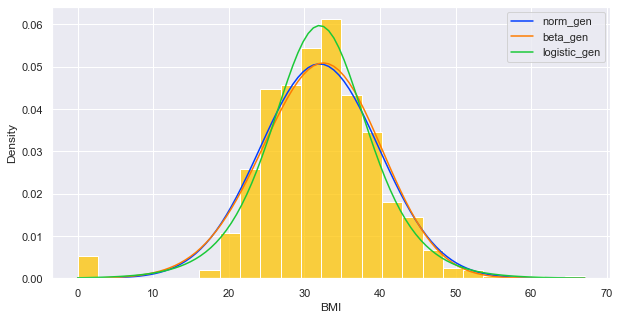

In [380]:
dists = [scipy.stats.norm,scipy.stats.beta,scipy.stats.logistic] # scipy.stats.lognorm
draw_dists(piece_data.BMI,dists)

Dist:  norm_gen val: (120.89453125, 31.95179590820272)
Dist:  rayleigh_gen val: (69.4487599118696, 42.82280146332465)
Dist:  chi2_gen val: (48.98134099738337, -44.731244396694635, 3.3609022622467917)


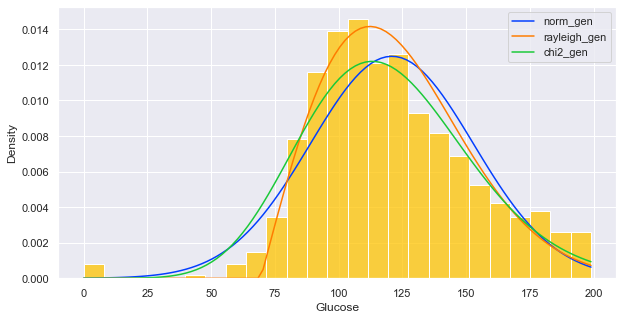

In [17]:
dists = [scipy.stats.norm,scipy.stats.rayleigh,scipy.stats.chi2] 
draw_dists(piece_data.Glucose,dists)

Dist:  norm_gen val: (119.15806451612903, 21.085253587152973)
Dist:  rayleigh_gen val: (80.35724546719247, 31.22572239118629)
Dist:  exponnorm_gen val: (1.3342263692417538, 101.20872498383505, 13.453005428125579)


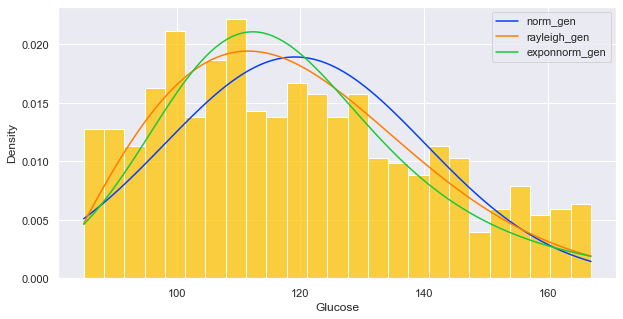

In [386]:
cGlucose = piece_data.Glucose[piece_data.Glucose.between(piece_data.Glucose.quantile(0.1),piece_data.Glucose.quantile(0.9))]
dists = [scipy.stats.norm,scipy.stats.rayleigh,scipy.stats.exponnorm] 
draw_dists(cGlucose,dists)

Dist:  exponnorm_gen val: (8.614506825032835, 0.13600483035238153, 0.03898905641231575)
Dist:  chi2_gen val: (3.173822861370073, 0.07669992011200226, 0.12451127574548791)
Dist:  lognorm_gen val: (0.7297925024429401, 0.03709616645174257, 0.33622598632669054)


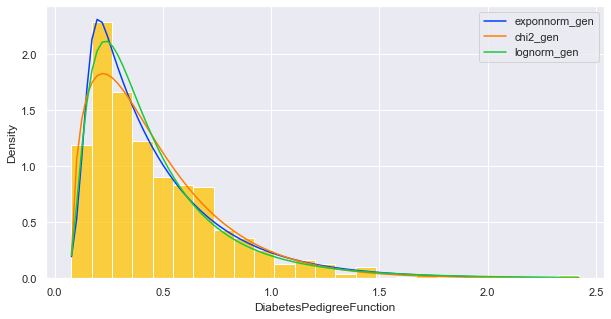

In [291]:
dists = [scipy.stats.exponnorm,scipy.stats.chi2,scipy.stats.lognorm] 
draw_dists(piece_data.DiabetesPedigreeFunction,dists)

In [151]:
cBloodPressure= piece_data.BloodPressure[(piece_data.BloodPressure!= 0) & (piece_data.BloodPressure != 122)]

Dist:  norm_gen val: (72.33743169398907, 12.245533052611554)
Dist:  logistic_gen val: (72.23491703295932, 6.859106125720202)
Dist:  tukeylambda_gen val: (0.048656163889723936, 72.26280766969776, 7.326929829749025)


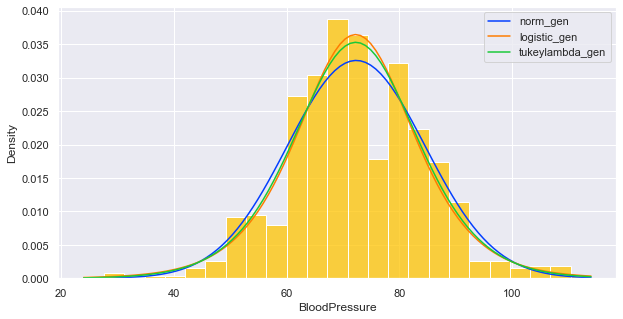

In [19]:
dists = [scipy.stats.norm,scipy.stats.logistic,scipy.stats.tukeylambda] 
draw_dists(cBloodPressure,dists)

#### 5. Оценить параметры выбранных распределений, используя методы максимального правдоподобия и метод наименьших квадратов.

In [82]:
def check_dist(column,dist,tol=0):
    
#     count_bins = round(1+3.32*math.log(column.shape[0]))
    mle = dist.fit(column)
    print('MLE {2}: {0}, {1}'.format(mle[0],mle[1],type(dist).__name__))
    
    val_quants = np.linspace(0,1,15)[1:-1]
    
    def MSE(res):
        return sum((column.quantile(val_quants).values - 
                    dist(*res).ppf(val_quants))**2)

    min_res = scipy.optimize.minimize(MSE,mle) if tol == 0 else scipy.optimize.minimize(MSE,mle,tol=tol)
    
    if(min_res.success):
        print('MSE {0}: {1}'.format(type(dist).__name__, min_res.x))
    else:
        print('MSE error')
    

In [21]:
print('DiabetesPedigreeFunction')
check_dist(piece_data.DiabetesPedigreeFunction,scipy.stats.exponnorm,tol=2) 
check_dist(piece_data.DiabetesPedigreeFunction,scipy.stats.lognorm)

DiabetesPedigreeFunction
MLE exponnorm_gen: 8.614506825032835, 0.13600483035238153
MSE exponnorm_gen: [8.61450683 0.13600483 0.03898906]
MLE lognorm_gen: 0.7297925024429401, 0.03709616645174257
MSE lognorm_gen: [ 0.57498856 -0.05949062  0.44816256]


In [139]:
dpf_best_params_expon = [8.61450683, 0.13600483, 0.03898906]

In [23]:
print('BloodPressure')
check_dist(cBloodPressure,scipy.stats.logistic) 


BloodPressure
MLE logistic_gen: 72.23491703295932, 6.859106125720202
MSE logistic_gen: [72.21428571  6.97806125]


In [140]:
bp_best_params_logistic = [72.21428571, 6.97806125]

In [87]:
print('Glucose')
check_dist(piece_data.Glucose,scipy.stats.chi2,tol=0.001) 
check_dist(piece_data.Glucose,scipy.stats.rayleigh) 

Glucose
MLE chi2_gen: 48.98134099738337, -44.731244396694635
MSE chi2_gen: [ 7.21386827 59.78620275  8.68652818]
MLE rayleigh_gen: 69.4487599118696, 42.82280146332465
MSE rayleigh_gen: [61.52974788 48.09401326]


In [83]:
print('сGlucose')
check_dist(cGlucose,scipy.stats.rayleigh) 

сGlucose
MLE rayleigh_gen: 80.35724546719247, 31.22572239118629
MSE rayleigh_gen: [76.54499545 34.29713495]


In [437]:
gl_best_params_ray_mle = [80.35724546719247, 31.22572239118629]
gl_best_params_ray_mse =  [76.54499545, 34.29713495]

In [27]:
print('BMI')
check_dist(piece_data.BMI,scipy.stats.logistic)
check_dist(piece_data.BMI,scipy.stats.norm)

BMI
MLE logistic_gen: 32.00100187512694, 4.18772728702919
MSE logistic_gen: [32.06868131  4.12012536]
MLE norm_gen: 31.992578124999998, 7.87902573154013
MSE norm_gen: [32.06868131  7.01409523]


In [142]:
bmi_best_params_logistic = [32.06868131, 4.12012536]
bmi_best_params_beta = [1320.47621587,570.28294842,-431.9278709,664.36437568]

#### 6. Проверьте оцененные параметры с помощью графика квантиль-квантиль (QQ).

In [69]:
def qq_plot(column,dist):
    
    figure, ax = plt.subplots(1, 1, figsize=(5, 5))

    res = dist.fit(column)
    scipy.stats.probplot(column, dist=dist, sparams=res, plot=ax)

    ax.get_lines()[0].set_marker('o')
    ax.get_lines()[0].set_color('blue')
    ax.get_lines()[1].set_ls('--')
    ax.get_lines()[1].set_color('black')
    ax.get_lines()[1].set_linewidth(0.75)
    plt.show()


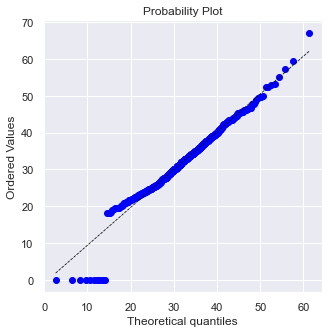

In [30]:
qq_plot(piece_data.BMI,scipy.stats.logistic)

In [31]:
piece_data.cBMI = piece_data.BMI[piece_data.BMI.between( 22.0,51.0)]
cBMI =  piece_data.BMI[piece_data.BMI.between( 24.0,51.0)]

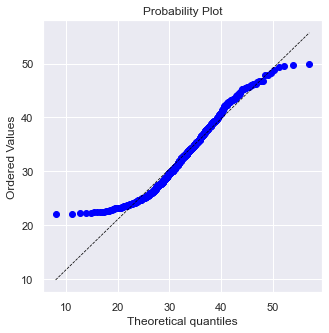

In [32]:
qq_plot(piece_data.cBMI,scipy.stats.logistic)

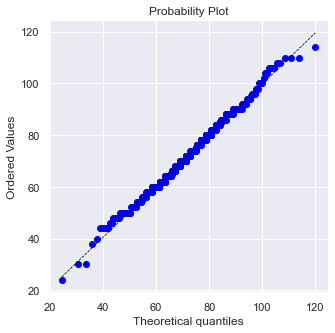

In [33]:
qq_plot(cBloodPressure, scipy.stats.logistic)

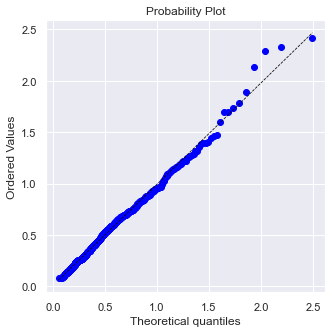

In [34]:
qq_plot(piece_data.DiabetesPedigreeFunction, scipy.stats.exponnorm)

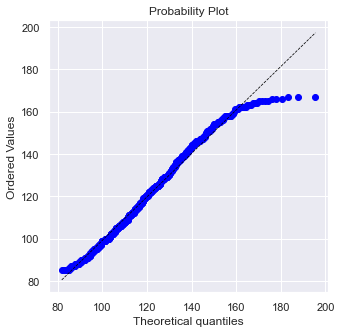

In [78]:
qq_plot(cGlucose, scipy.stats.rayleigh)

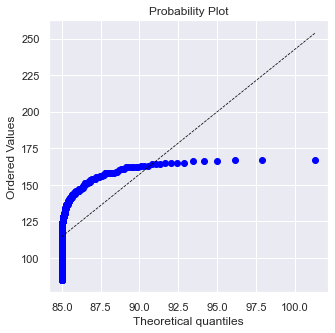

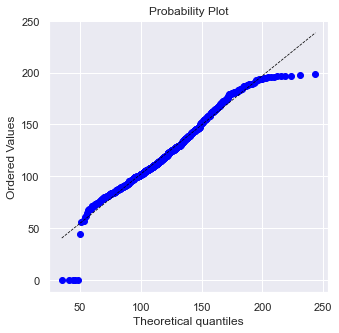

In [80]:
qq_plot(cGlucose, scipy.stats.chi2)
qq_plot(piece_data.Glucose, scipy.stats.chi2)

#### 7. Оценить достоверность подогнанных распределений, используя не менее 2 статистических тестов.


In [18]:
def testing_ktest(column,dist,dist_name,params):
    
    params = dist.fit(column)
    ks = scipy.stats.kstest(column, dist_name, params, N=100)
    print(ks)
    
#     x = np.linspace(np.min(column), np.max(column), column.shape[0])  
#     y = dist.pdf(x, *params)
#     t_st = scipy.stats.ttest_ind(column,y)
    
    
    
def testing_by_tt(column,dist,param):
    
    val_quants = np.linspace(0,1,302)[1:-1]
    
    a = column.quantile(val_quants).values
    b = dist(*param).ppf(val_quants)

    tt = scipy.stats.ttest_ind(a,b)
    print(tt)

In [38]:
print('DiabetesPedigreeFunction')
testing_ktest(piece_data.DiabetesPedigreeFunction,scipy.stats.exponnorm,'exponnorm',dpf_best_params_expon)

testing_by_tt(piece_data.DiabetesPedigreeFunction,scipy.stats.exponnorm, dpf_best_params_expon)

DiabetesPedigreeFunction
KstestResult(statistic=0.027263520293784205, pvalue=0.6078932307889306)
Ttest_indResult(statistic=-0.022636529821769957, pvalue=0.9819477557799899)


In [306]:
print('Glucose')
testing_ktest(cGlucose,scipy.stats.rayleigh,'rayleigh',gl_best_params_ray_mle)
testing_by_tt(cGlucose,scipy.stats.rayleigh, gl_best_params_ray_mle)

testing_ktest(cGlucose,scipy.stats.rayleigh,'rayleigh',gl_best_params_ray_mse)
testing_by_tt(cGlucose,scipy.stats.rayleigh, gl_best_params_ray_mse)

Glucose
KstestResult(statistic=0.050987950319996034, pvalue=0.07689259473683874)
Ttest_indResult(statistic=-0.1771240994108803, pvalue=0.8594708871223815)
KstestResult(statistic=0.050987950319996034, pvalue=0.07689259473683874)
Ttest_indResult(statistic=-0.18595656185850984, pvalue=0.8525418854700508)


In [40]:
print('BloodPressure')
testing_ktest(cBloodPressure,scipy.stats.logistic,'logistic',bp_best_params_logistic)
testing_by_tt(cBloodPressure,scipy.stats.logistic, bp_best_params_logistic)

BloodPressure
KstestResult(statistic=0.045225795497884524, pvalue=0.09710051922386276)
Ttest_indResult(statistic=0.14661661932337558, pvalue=0.8834840478405295)


In [41]:
print('BMI')
testing_ktest(piece_data.BMI,scipy.stats.logistic,'logistic',bmi_best_params_logistic)
testing_by_tt(piece_data.BMI,scipy.stats.logistic,bmi_best_params_logistic)

BMI
KstestResult(statistic=0.030994554789746435, pvalue=0.4429744646328587)
Ttest_indResult(statistic=-0.14111172235994218, pvalue=0.8878292045577434)


### 8. Используя одномерные параметрические распределения, которые были подобраны, выполните семплирование СВ. Используйте для этого не менее 2 различных методов семплирования.

### Метод обратной функции

In [450]:
def draw_dists(dists,names,colors):
    plt.figure(figsize=(20, 20))
    plot_number = 0
    for dist in dists:
        plot_number += 1
        plt.subplot(4, 4, plot_number)
        sns.histplot(data=dist, bins=count_bins,color=colors[plot_number-1])
        plt.title(names[plot_number-1])
        

In [95]:
# обратная экспон функция
def transform_expon(scale):
    r = np.linspace(0,1,700)[1:-1]
    lambd = 1 / scale[1] 
    return (-1 / lambd) * pd.Series(r).apply(lambda x : math.log(x))


<AxesSubplot:>

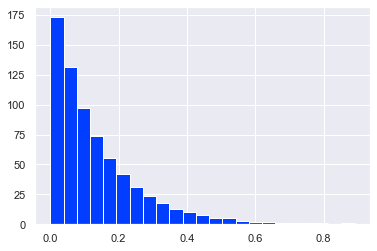

In [118]:
reverse_expon = transform_expon(dpf_best_params_expon) # LS
reverse_expon.hist(bins=23)

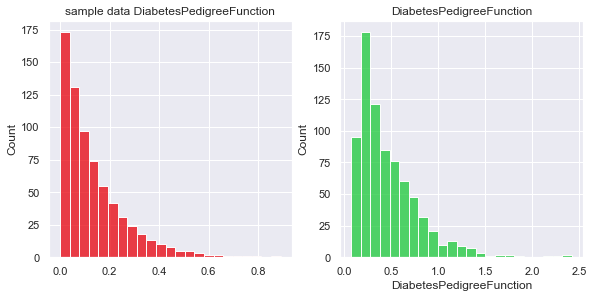

In [382]:
draw_dists([reverse_expon,piece_data.DiabetesPedigreeFunction],['sample data DiabetesPedigreeFunction','DiabetesPedigreeFunction'],['r','g'])

In [137]:
# обратная логистическая функция
def transform_logistic(u,s):
    r = np.linspace(0,1,700)[1:-1]
    return (u - s * pd.Series(r).apply(lambda x : math.log((1/x) - 1)))

In [148]:
bp_reverse_lg = transform_logistic(*bp_best_params_logistic)

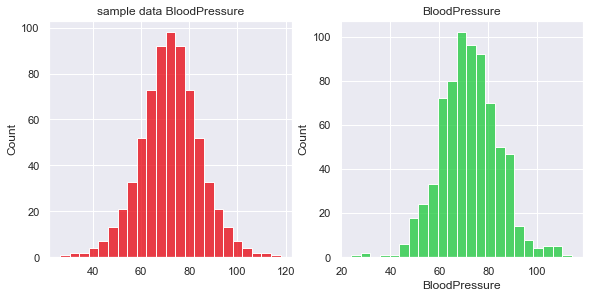

In [152]:
draw_dists([bp_reverse_lg,cBloodPressure],['sample data BloodPressure','BloodPressure'],['r','g'])

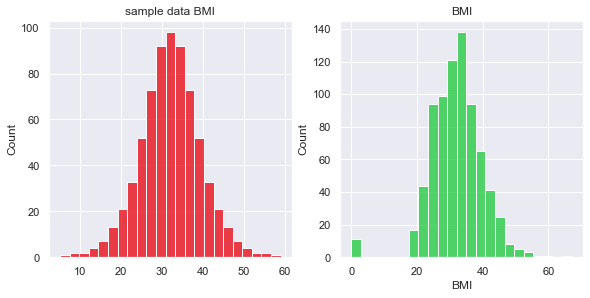

In [153]:
bmi_reverse_lg = transform_logistic(*bmi_best_params_logistic)
draw_dists([bmi_reverse_lg,piece_data.BMI],['sample data BMI','BMI'],['r','g'])

In [157]:
# обратная функция Релея
def transform_ray(s):
    r = np.linspace(0,1,300)[1:-1]
    return (s * np.sqrt(-2 * np.log(r)))

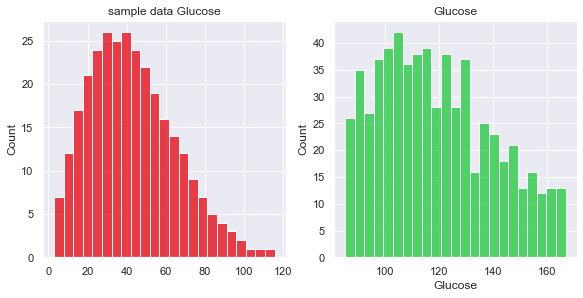

In [158]:
gl_reverse_ray = transform_ray(gl_best_params_ray_mse[1])
draw_dists([gl_reverse_ray,cGlucose],['sample data Glucose','Glucose'],['r','g'])

### Accept-reject

In [470]:
def rejection_sampling_normal(dist, own_loc,own_scale,big_loc,big_scale):
    
    maximum = own_loc
    upper = dist.pdf(own_loc,loc=own_loc, scale=own_scale)
    
    samples = []
    n = 1000
    u,r =[],[]
    u = np.random.logistic(loc=big_loc, scale=big_scale,size= n)
    r = np.random.logistic(0, upper, size=n)
    
    v = u[r < dist.pdf(u)]
    
    return v

#### BMI

<AxesSubplot:>

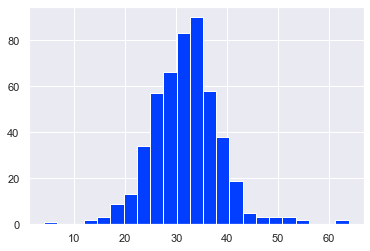

In [471]:
big_logistic = [32,3.55]
rv_bmi = rejection_sampling_normal(scipy.stats.logistic,bmi_best_params_logistic[0],bmi_best_params_logistic[1],*big_logistic)
pd.Series(rv_bmi).hist(bins=23)

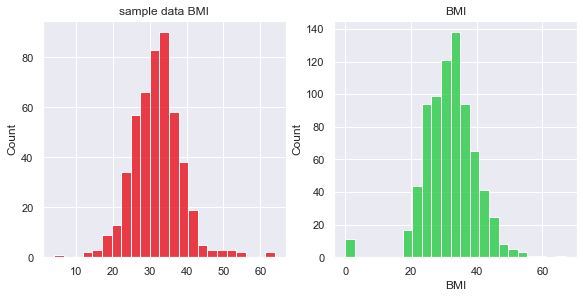

In [472]:
draw_dists([rv_bmi,piece_data.BMI],['sample data BMI','BMI'],['r','g'])

#### BloodPresure

<AxesSubplot:>

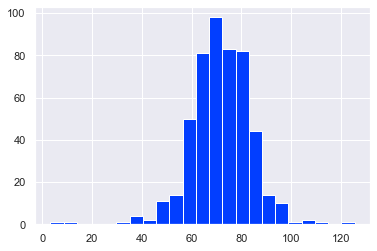

In [479]:
bp_big_logistic = [72,6.6]
rv_bp = rejection_sampling_normal(scipy.stats.logistic,bp_best_params_logistic[0],bp_best_params_logistic[1],*bp_big_logistic)
pd.Series(rv_bp).hist(bins=23)

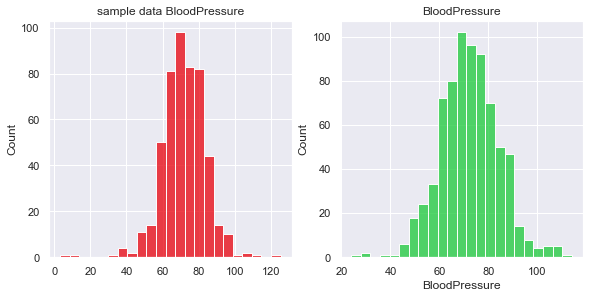

In [480]:
draw_dists([rv_bp,cBloodPressure],['sample data BloodPressure','BloodPressure'],['r','g'])

### Glucose

In [265]:
def rejection_sampling_ray(dist, true_params,big_dist_params):
    
    maximum = true_params[0]
    upper = dist.pdf(maximum,*true_params)
    
    samples = []
    n=1000

    u = np.random.triangular(big_dist_params[0],big_dist_params[1],big_dist_params[2],size= n)
    r = np.random.logistic(0, upper, size=n)
        
    v = u[r < scipy.stats.triang.pdf(u,*big_dist_params)]
    
    return v

<AxesSubplot:>

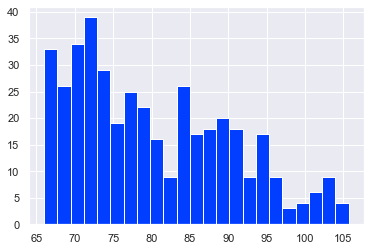

In [486]:
gl_big_triang = [0.36888, 66, 110]
gl_triang = rejection_sampling_ray(scipy.stats.rayleigh,gl_best_params_ray_mse,gl_big_triang)
pd.Series(gl_triang).hist(bins=23)

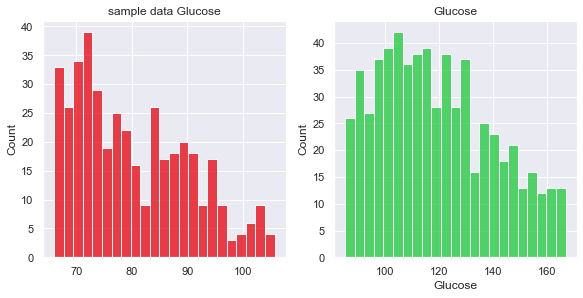

In [487]:
draw_dists([gl_triang,cGlucose],['sample data Glucose','Glucose'],['r','g'])

#### DiabetesPedigreeFunction

In [352]:
def rejection_sampling_expon(dist,true_params,big_params):
    
    maximum = true_params[1]
    upper = scipy.stats.exponnorm.pdf(maximum,*true_params)
    
    samples = []
    n=1000
    
    u = np.random.exponential(big_params[1], size = n)
    r = np.random.exponential(upper, size=n)
        
    v = u[r > dist.pdf(u,big_params[1])]
    
    return v

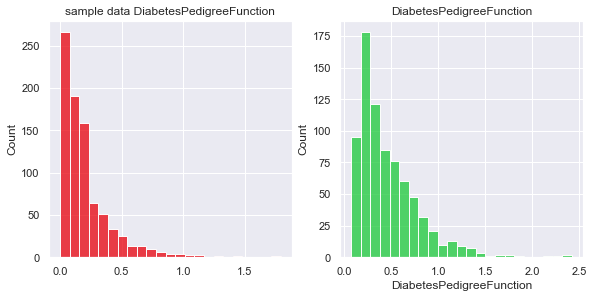

In [357]:
big_params = [0.1, 0.25]
dpf_reverse_exp = rejection_sampling_expon(scipy.stats.expon,dpf_best_params_expon,big_params)
draw_dists([dpf_reverse_exp,piece_data.DiabetesPedigreeFunction],['sample data DiabetesPedigreeFunction','DiabetesPedigreeFunction'],['r','g'])

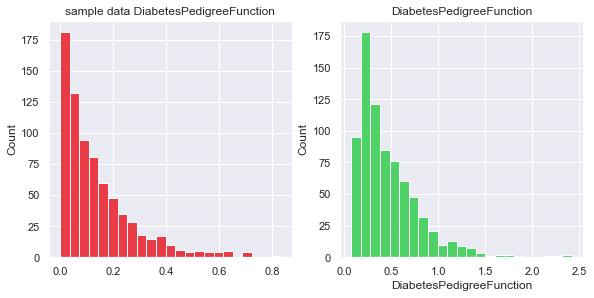

In [327]:
big_params = [8, 0.14, 0.03898906]
dpf_reverse_exp = rejection_sampling_expon(scipy.stats.exponnorm,dpf_best_params_expon,big_params)
draw_dists([dpf_reverse_exp,piece_data.DiabetesPedigreeFunction],['sample data DiabetesPedigreeFunction','DiabetesPedigreeFunction'],['r','g'])

Нарисовать накрывающее распределение на гистограмме данных 